In [ ]:
# Installing matplotlib
# pip install matplotlib - In CMD line
# !pip install matplotlib - In Jupyter cell
# OR
# %pip install matplotlib - In Jupyter cell

In [ ]:
# Importing Matplotlib
import matplotlib.pyplot as plt
# plt is athe alias name for pyplot
import numpy as np
# np is the alias for numpy
import pandas as pd
# pd is the alias for pandas

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Loading Dataset
df = pd.read_csv('Bollywood_Movies_Dataset.csv')
# Print the Type of df
print(type(df))
# Show top 5 rows
df.head()  

<class 'pandas.core.frame.DataFrame'>


,Movie_Name,BO_Collection,Budget,Box_Office_Verdict
0,Pyaar Ka Punchnama 2,53.25,25.0,Hit
1,Shandaar,38.28,68.0,Flop
2,Singh is Bliing,74.87,92.0,Flop
3,Jazbaa,24.3,30.0,Flop
4,Talvar,24,22.0,Plus


In [ ]:
# Convert data type of BO_Collectio from object to float to int
# Convert data type of Budget from float to int
# Making a new column 'Profit' by subtracting 'Budget'from 'BO_Collection'
df['BO_Collection'] = df['BO_Collection'].astype(float)
df['BO_Collection'] = df['BO_Collection'].astype(int) 
df['Budget'] = df['Budget'].astype(int)
# Making a new column 'Profit' by subtracting 'Budget'from 'BO_Collection'
df['Profit'] = df['BO_Collection']-df['Budget']
df.head()

,Movie_Name,BO_Collection,Budget,Box_Office_Verdict,Profit
0,Pyaar Ka Punchnama 2,53,25,Hit,28
1,Shandaar,38,68,Flop,-30
2,Singh is Bliing,74,92,Flop,-18
3,Jazbaa,24,30,Flop,-6
4,Talvar,24,22,Plus,2


Plotting a simple Box PLot

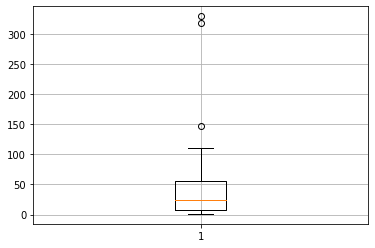

In [ ]:
plt.boxplot(df['BO_Collection']) # Plot the box plot of BO_Collection
plt.grid() # Showing grid for the plot 
plt.show() # Showing the plot

From the Plot we can conclude  that <br>
- q1 - 8.00
- q2 - 23.50
- q3 - 56.00

In [ ]:
# Verifying the Output from the plot using describe() function.
df['BO_Collection'].describe()

count     52.000000
mean      45.673077
std       65.562938
min        1.000000
25%        8.000000
50%       23.500000
75%       56.000000
max      330.000000
Name: BO_Collection, dtype: float64

Customixing the Box Plot

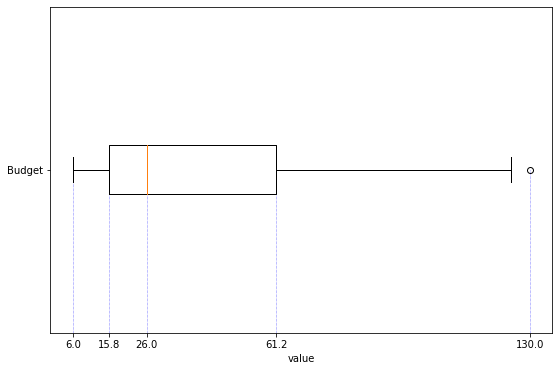

In [ ]:
fig = plt.figure(1, figsize=(9, 6)) # setting plt figure and figuresize
ax = fig.add_subplot(111) # Setting plot axis
# Configuring box plot
# setting vert =  false, so as to make plot horizontal
# setting manage_ticks=True, so that the tick locations and labels will be adjusted to match the boxplot positions.
ax.boxplot(df['Budget'], vert=False, manage_ticks=True) 
ax.set_xlabel('value') # set X-label as value
ax.set_yticks([1]) # set Y-tick location 
ax.set_yticklabels(['Budget']) # set Y-tick label
# Calculate Quantiles for Budget column
quantiles = np.quantile(df['Budget'], np.array([0.00, 0.25, 0.50, 0.75, 1.00]))
# Setting vlines to add vertical lines in data coordinates and configuring them.
ax.vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size,
          color='b', ls=':', lw=0.5, zorder=0)
ax.set_ylim(0.5, 1.5) #Setting Y limit for box plot
ax.set_xticks(quantiles) # showing quantiles on X-axis
plt.show() # Showing the plot

In [ ]:
# Verifying the Output from the plot using describe() function.
df['Budget'].describe()

count     52.000000
mean      40.673077
std       32.771174
min        6.000000
25%       15.750000
50%       26.000000
75%       61.250000
max      130.000000
Name: Budget, dtype: float64

Creating a stacked Bar Graph

In [ ]:
df_top_movies=df.nlargest(n=5, columns=['BO_Collection'])
df_top_movies = df_top_movies.set_index('Movie_Name')
df_top_movies

,BO_Collection,Budget,Box_Office_Verdict,Profit
Movie_Name,,,,
PK,330,90,All Time Blockbuster,240
Bajrangi Bhaijaan,318,125,All Time Blockbuster,193
Tanu Weds Manu,148,40,Blockbuster,108
Baahubali (Hindi),111,130,Hit,-19
ABCD 2,105,60,Super Hit,45


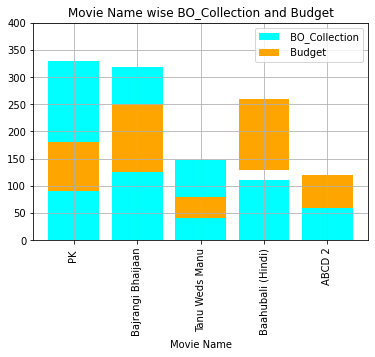

In [ ]:
# Customizing first variable bars with color and label
plt.bar(df_top_movies.index,df_top_movies['BO_Collection'],color='cyan',label=' BO_Collection')
# Customizing second variable bars with color and label
plt.bar(df_top_movies.index,df_top_movies['Budget'],color='orange',label=' Budget',bottom=df_top_movies['Budget'])
plt.xlabel('Movie Name') # setting x-lable
plt.legend() # Showing legend for the plot
plt.title('Movie Name wise BO_Collection and Budget') # Setting title for the plot
plt.xticks(rotation=90) # Rotating x-labels by 90 degree
plt.grid() # Showing grid for the plot 
plt.ylim(0,400) # Setting y limit for Y-axis
plt.show() # Showing the plot

In [ ]:
budget_df= df_top_movies[['BO_Collection','Budget','Profit']]
budget_df

,BO_Collection,Budget,Profit
Movie_Name,,,
PK,330,90,240
Bajrangi Bhaijaan,318,125,193
Tanu Weds Manu,148,40,108
Baahubali (Hindi),111,130,-19
ABCD 2,105,60,45


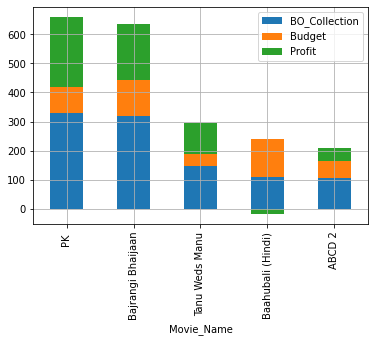

In [ ]:
budget_df.plot(kind='bar',stacked=True) # Plotting a stack bar graph using plot() function
plt.grid() # Showing grid for the plot 
plt.show() # Showing the plot

Creating a Stacked Area Chart

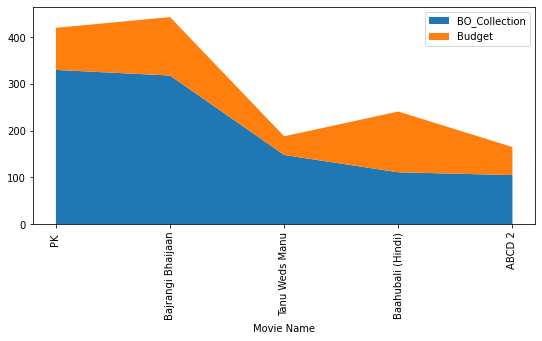

In [ ]:
plt.figure(figsize=(9,4)) # setting plot figure size
# Configuring Stacked Area chart for two variables
plt.stackplot(budget_df.index,budget_df['BO_Collection'],budget_df['Budget'], labels=['BO_Collection','Budget'])
plt.xlabel('Movie Name') # setting x-lable
plt.xticks(rotation=90) # Rotating x-labels by 90 degree
plt.legend() # Showing legend for the plot
plt.show() # Showing the plot

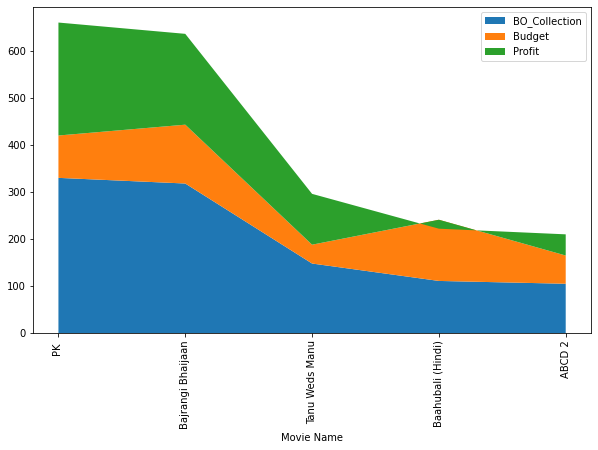

In [ ]:
plt.figure(figsize=(10,6)) # setting plot figure size
# Configuring Stacked Area chart for three variables
plt.stackplot(budget_df.index,budget_df['BO_Collection'],budget_df['Budget'],budget_df['Profit'], 
              labels=['BO_Collection','Budget','Profit'])
plt.xlabel('Movie Name') # setting x-lable
plt.xticks(rotation=90) # Rotating x-labels by 90 degree
plt.legend() # Showing legend for the plot
plt.show() # Showing the plot